In [2]:
from  sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
iris=load_iris()
X=iris.data
y=iris.target

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=False).split(range(25))
print('{}{:^61}{}'.format("Iteration",'Training set observation',"Testing set observation"))
for Iteration,data in enumerate(kf,start=1):
    print('{:^9}{}{:^25}'.format(Iteration,data[0],str(data[1])))

Iteration                  Training set observation                   Testing set observation
    1    [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [0 1 2 3 4]       
    2    [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [5 6 7 8 9]       
    3    [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]    [10 11 12 13 14]     
    4    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]    [15 16 17 18 19]     
    5    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]    [20 21 22 23 24]     


In [23]:
from sklearn.model_selection import cross_val_score

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [26]:
print(scores.mean())

0.9666666666666668


In [28]:
k_range=list(range(1,31))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'cross validated accuracy')

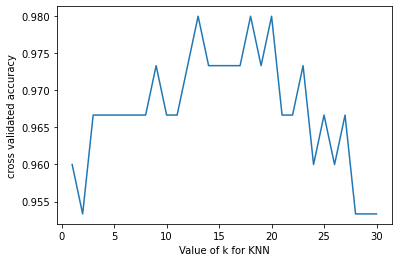

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("cross validated accuracy")

In [30]:
# "কে নিয়ারেস্ট নেইবার" সঙ্গে ১০ "কে ফোল্ড" ক্রস ভ্যালিডেশন
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001
